In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load data

# Data from https://archive.ics.uci.edu/ml/datasets/Student+Performance
!unzip student.zip

student_mat = pd.read_csv('student-mat.csv', sep=';')
student_por = pd.read_csv('student-por.csv', sep=';')

student_data = pd.concat([student_mat, student_por])
student_data.head()

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

In [7]:
# Feature extraction
student_data_extracted = student_data[['studytime', 'schoolsup', 'paid', 'health', 'absences', 'G1', 'G2', 'G3']].copy()
student_data_extracted.head()

,studytime,schoolsup,paid,health,absences,G1,G2,G3
0,2,yes,no,3,6,5,6,6
1,2,no,no,3,4,5,5,6
2,2,yes,yes,3,10,7,8,10
3,3,no,yes,5,2,15,14,15
4,2,no,yes,5,4,6,10,10


In [8]:
# Convert categorical columns to numeric
student_data_extracted['schoolsup'] = student_data_extracted['schoolsup'].apply({"yes": 0, "no": 1}.get)
student_data_extracted['paid'] = student_data_extracted['paid'].apply({"yes": 0, "no": 1}.get)

In [9]:
# Create train and test datasets
train_data = student_data_extracted.sample(frac=0.8, random_state=0)
test_data = student_data_extracted.drop(train_data.index)

print(train_data.shape, test_data.shape)

# Pop labels
train_labels = train_data.pop('G3')
test_labels = test_data.pop('G3')

(835, 8) (87, 8)


In [10]:
# Create model
model = keras.Sequential([keras.layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())]),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(1)
                         ])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[ 'mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Train model on train data
history = model.fit(train_data,
                    train_labels,
                    validation_split=0.2,
                    verbose=0,
                    epochs=1000)

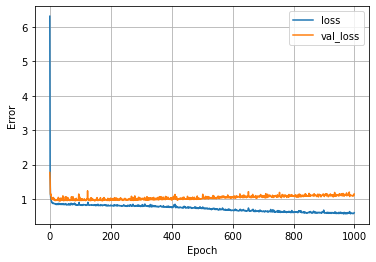

In [12]:
# Plot loss,
plt.plot(history.history['loss'], label='loss'),
plt.plot(history.history['val_loss'], label='val_loss'),
plt.xlabel('Epoch'),
plt.ylabel('Error'),
plt.legend(),
plt.grid(True)